<a href="https://colab.research.google.com/github/tsilverio/Desafio1_DataScience/blob/master/Titanic_Thiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install pyjanitor

In [0]:
! pip install imblearn

In [0]:
#IMPORTANDO BIBLIOTECAS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import janitor
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_rows', None)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [337]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (3).csv


In [338]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


In [0]:
df_train=pd.read_csv('train.csv').clean_names()
df_test=pd.read_csv('test.csv').clean_names()

In [340]:
df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [0]:
df_test.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

**Explorando os Dados**

**Objetivos:**
- Verificar a quantidade de homens e mulheres sobreviventes (Sex) / Pressuposto que as mulheres sejam as sobreviventes
- Verificar os sobreviventes por Classe (pClass) / Pressuposto que a primeira classe seja a que mais sobreviveu.
- Verificar os sobreviventes por Parentes (Filhos/Pais/Irmãos) a bordo (SibSb e Parch) / Pressuposto que pessoas sozinhas podem se salvar mais facilmente
- Verificar os sobreviventes por idade (Age) / Pressuposto que bebês/crianças e idosos sejam os que mais sobreviveram
- Verificar sobreviventes que possuem cabine (Cabin) / Existem muitos dados faltando, vamos vericar quantos sobreviveram que possuem registro de cabine
- Verificar sobreviventes por valor da Passagem (Fare) / Pressuposto passagens mais caras foram compradas pelos mais ricos, que possuem mais chance de sobreviver.

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


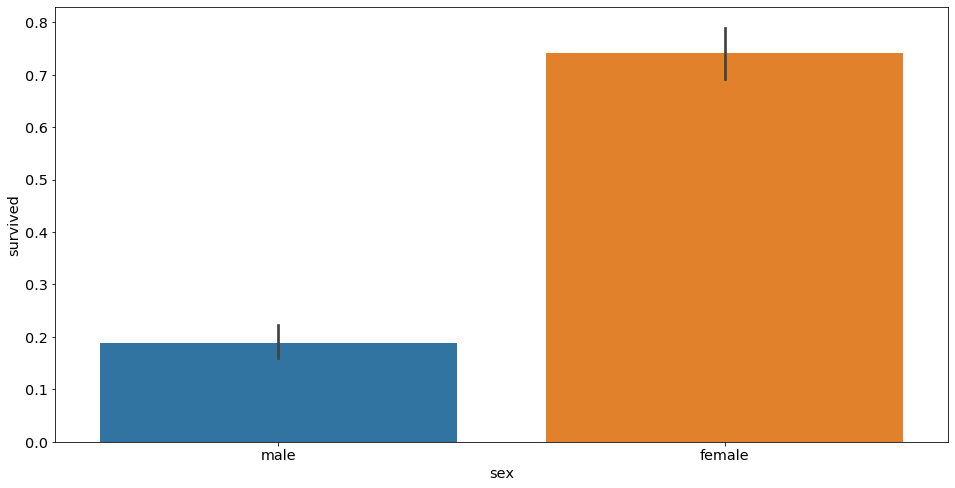

In [0]:
#Plotando um grafico de barras dos sobreviventes por Sexo
sns.barplot(x="sex", y="survived", data=df_train)

#Mostrando as % de mulheres vs homens que sobreviveram
print("Porcentagem de Mulheres Sobreviventes:", df_train["survived"][df_train["sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Porcentagem de Homens Sobreviventes:", df_train["survived"][df_train["sex"] == 'male'].value_counts(normalize = True)[1]*100)

Porcentagem da Pclass = 1 que sobreviveu: 62.96296296296296
Porcentagem da Pclass = 2 que sobreviveu: 47.28260869565217
Porcentagem da Pclass = 3 que sobreviveu: 24.236252545824847


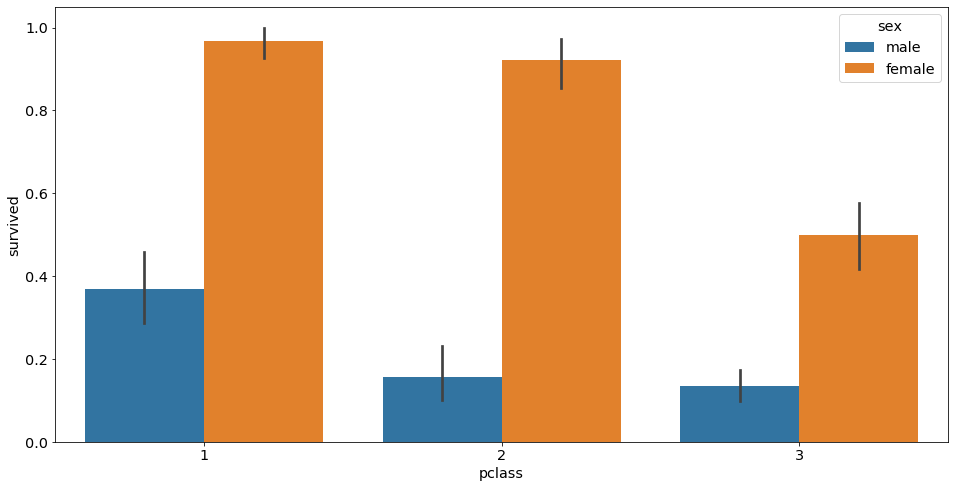

In [341]:
#Plotando sobreviventes por Pclass
sns.barplot(x="pclass", y="survived", data=df_train, hue='sex')

#Mostrando a % de sobreviventes pelas Classes.
print("Porcentagem da Pclass = 1 que sobreviveu:", df_train["survived"][df_train["pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Porcentagem da Pclass = 2 que sobreviveu:", df_train["survived"][df_train["pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Porcentagem da Pclass = 3 que sobreviveu:", df_train["survived"][df_train["pclass"] == 3].value_counts(normalize = True)[1]*100)

Porcentagem de SibSp = 0 Sobrevivente: 34.53947368421053
Porcentagem de SibSp = 1 Sobrevivente: 53.588516746411486
Porcentagem de SibSp = 2 Sobrevivente: 46.42857142857143
Porcentagem de SibSp = 3 Sobrevivente: 25.0
Porcentagem de SibSp = 4 Sobrevivente: 16.666666666666664


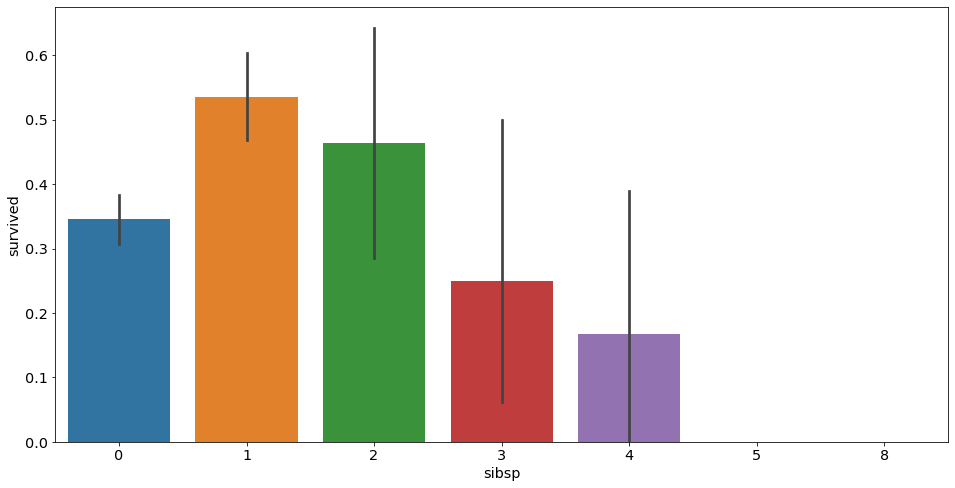

In [0]:
#Plotando sobreviventes por Sibsp
sns.barplot(x="sibsp", y="survived", data=df_train)

#Mostrando a % de Sobreviventes por Sibsp
print("Porcentagem de SibSp = 0 Sobrevivente:", df_train["survived"][df_train["sibsp"] == 0].value_counts(normalize = True)[1]*100)

print("Porcentagem de SibSp = 1 Sobrevivente:", df_train["survived"][df_train["sibsp"] == 1].value_counts(normalize = True)[1]*100)

print("Porcentagem de SibSp = 2 Sobrevivente:", df_train["survived"][df_train["sibsp"] == 2].value_counts(normalize = True)[1]*100)

print("Porcentagem de SibSp = 3 Sobrevivente:", df_train["survived"][df_train["sibsp"] == 3].value_counts(normalize = True)[1]*100)

print("Porcentagem de SibSp = 4 Sobrevivente:", df_train["survived"][df_train["sibsp"] == 4].value_counts(normalize = True)[1]*100)

#print("Porcentagem de SibSp = 5 Sobrevivente:", df_train["survived"][df_train["sibsp"] == 5].value_counts(normalize = True)[1]*100)


OBS: PESSOAS SOZINHAS TEM MENOS CHANCE DE SOBREVIVER DO QUE PESSOAS COM 1 OU 2 PARENTES (IRMÃOS E COMPANHEIROS), MAS COM MAIS CHANCE DO QUE FAMILIAS COM 3 OU 4.

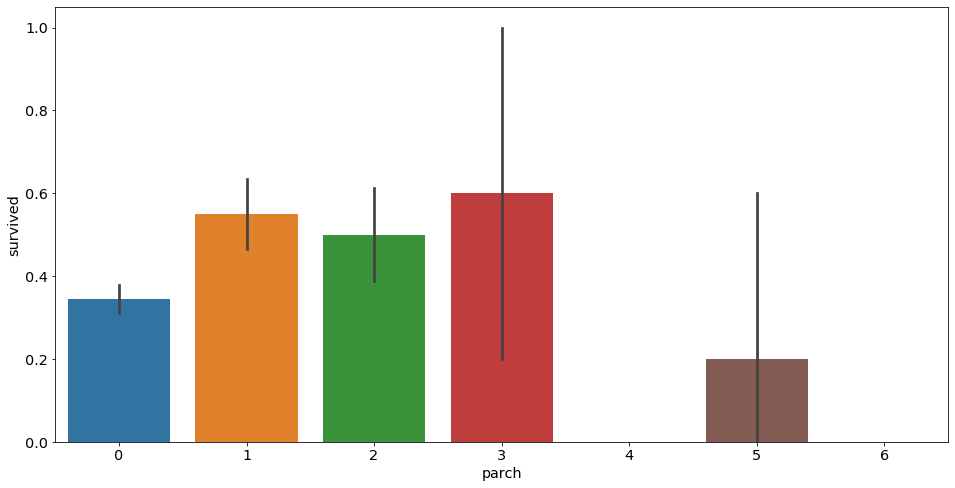

In [0]:
#Plotando sobreviventes pela quantidade de filhos e Pais
sns.barplot(x="parch", y="survived", data=df_train)
plt.show()

OBS: CONTRARIANDO O PRESSUPOSTO, PESSOAS SOZINHAS TEM MENOS CHANCES DE SOBREVIVER DO QUE PESSOAS QUE POSSUEM ATÉ 3 PARENTES (ENTRE FILHOS E PAIS), MAS MAIS CHANCES DO QUE QUEM TEM 5 NO TOTAL.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


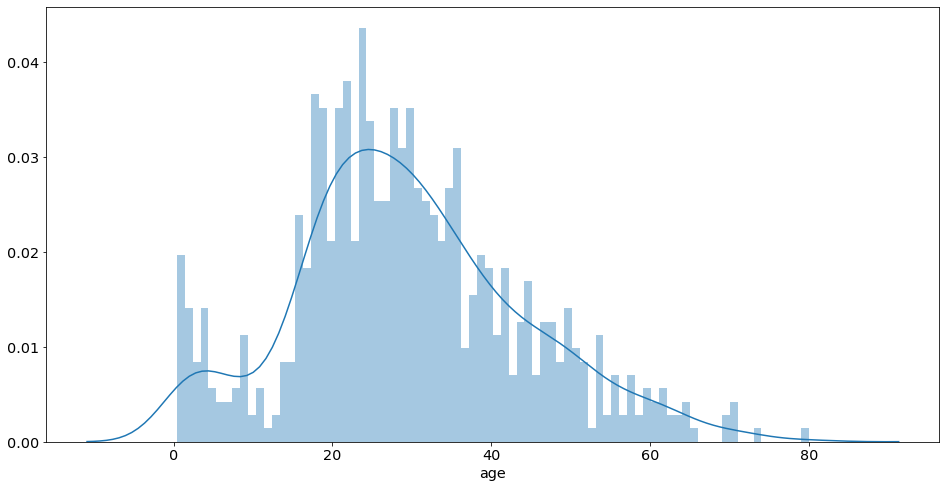

In [0]:
sns.distplot(df_train['age'], bins=80);

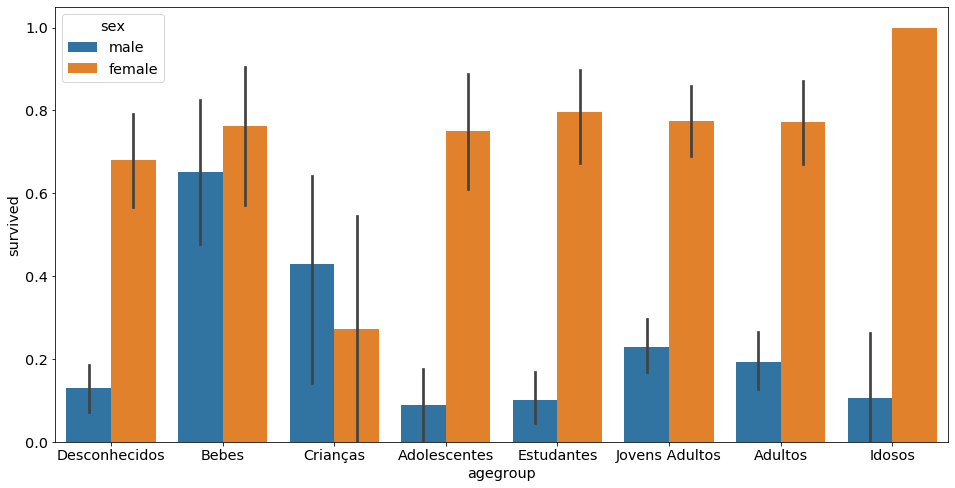

In [343]:
#Classificando e comparando as Idades dos sobreviventes
#Foi adicionado um valor negativo para os registros sem identificação da idade
df_train["age"] = df_train["age"].fillna(-0.5)
df_test["age"] = df_test["age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Desconhecidos', 'Bebes', 'Crianças', 'Adolescentes', 'Estudantes', 'Jovens Adultos', 'Adultos', 'Idosos']
df_train['agegroup'] = pd.cut(df_train["age"], bins, labels = labels)
df_test['agegroup'] = pd.cut(df_test["age"], bins, labels = labels)

#Plotando os sobreviventes dos grupos que criamos 
sns.barplot(x="agegroup", y="survived", data=df_train, hue='sex')
plt.show()

Porcentagem CabinBool = 1 Sobreviventes: 66.66666666666666
Porcentagem CabinBool = 0 Sobreviventes: 29.985443959243085


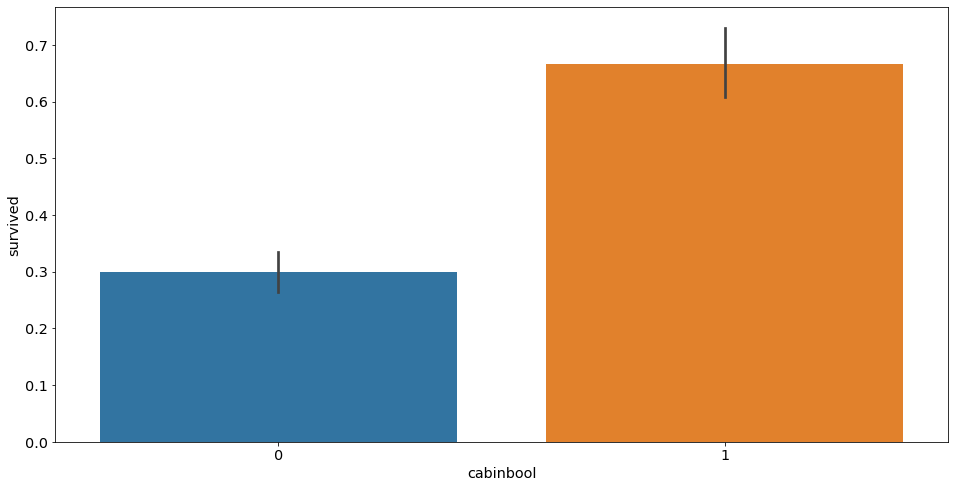

In [344]:
#Existem muitos registros sem Cabine, vamos criar uma Dummy para classificar aqueles que possuem cabine e qual a relação com os sobreviventes
df_train["cabinbool"] = (df_train["cabin"].notnull().astype('int'))
df_test["cabinbool"] = (df_test["cabin"].notnull().astype('int'))

#Calculando a % de sobreviventes com cabine
print("Porcentagem CabinBool = 1 Sobreviventes:", df_train["survived"][df_train["cabinbool"] == 1].value_counts(normalize = True)[1]*100)
print("Porcentagem CabinBool = 0 Sobreviventes:", df_train["survived"][df_train["cabinbool"] == 0].value_counts(normalize = True)[1]*100)

#Plotando as relação das cabines com sobreviventes
sns.barplot(x="cabinbool", y="survived", data=df_train)
plt.show()

OBS: VERIFICAMOS QUE CERCA DE 67% DAQUELES QUE POSSUEM REGISTRO DE CABINE SOBREVIVERAM VS 30% DAQUELES QUE NÃO POSSUEM REGISTROS DE CABINE

- Tratamento
Limpando dados:

In [0]:
df_test.describe(include="all")
#total de 418 passageiros.
#Temos 1 valor no "Fare" faltando.
#Estão faltando muitos registos de idade

,passengerid,pclass,name,sex,age,sibsp,parch,fare,embarked,cabinbool,agegroup,title
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,417.000000,418,418.000000,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,NaN,3,NaN,8,NaN
top,NaN,NaN,"Johansson, Mr. Nils",male,NaN,NaN,NaN,NaN,S,NaN,Jovens Adultos,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,NaN,270,NaN,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,35.627188,NaN,0.217703,NaN,1.755981
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,55.907576,NaN,0.413179,NaN,1.058380
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,7.895800,NaN,0.000000,NaN,1.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,14.454200,NaN,0.000000,NaN,1.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,31.500000,NaN,0.000000,NaN,2.000000


Tratamento Cabine

In [0]:
#Dropando a coluna da Cabine, já que não será mais necessária
df_train = df_train.drop(['cabin'], axis = 1)
df_test = df_test.drop(['cabin'], axis = 1)

Tratamento Ticket

In [0]:
#Dropando a coluna de Ticket, já que não encontramos uma utilidade
df_train = df_train.drop(['ticket'], axis = 1)
df_test = df_test.drop(['ticket'], axis = 1)

Tratamento Embarque

In [347]:
#Preenchendo os valores faltantes no Embarque com os dados do Porto que possuem mais passageiros
print("PAssageiros em Southampton (S):")
southampton = df_train[df_train["embarked"] == "S"].shape[0]
print(southampton)

print("Passageiros em Cherbourg (C):")
cherbourg = df_train[df_train["embarked"] == "C"].shape[0]
print(cherbourg)

print("Passageiros em Queenstown (Q):")
queenstown = df_train[df_train["embarked"] == "Q"].shape[0]
print(queenstown)

PAssageiros em Southampton (S):
644
Passageiros em Cherbourg (C):
168
Passageiros em Queenstown (Q):
77


In [0]:
#Preenchendo os faltantes com o Embarked S (644 passageiros)
df_train = df_train.fillna({"embarked": "S"})

Tratamento de Idade - Vamos categorizar as idades desconhecidas utilizando o valor da moda atribuidas na categorização dos titulos do nome


In [349]:
combine = [df_train, df_test]

#Extraindo os titulos do Nome
for dataset in combine:
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['title'], df_train['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [350]:
#Concatenando os titulos por titulos mais comuns
for dataset in combine:
    dataset['title'] = dataset['title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['title'] = dataset['title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')

df_train[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [351]:
#Categorizando cada grupo de titulos
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)

df_train.head(n=20)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,agegroup,cabinbool,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Estudantes,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adultos,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Jovens Adultos,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Jovens Adultos,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Jovens Adultos,0,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,Desconhecidos,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Adultos,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Bebes,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Jovens Adultos,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Adolescentes,0,3


In [0]:
#Preenchendo as idades desconhecidas com o valor da moda do grupo de titulos
mr_age = df_train[df_train["title"] == 1]["agegroup"].mode() #Jovens Adultos
miss_age = df_train[df_train["title"] == 2]["agegroup"].mode() #Estudantes
mrs_age = df_train[df_train["title"] == 3]["agegroup"].mode() #Jovens Adultos
master_age = df_train[df_train["title"] == 4]["agegroup"].mode() #Adultos
royal_age = df_train[df_train["title"] == 5]["agegroup"].mode() #Adultos
rare_age = df_train[df_train["title"] == 6]["agegroup"].mode() #Adultos

age_title_mapping = {1: "Jovens Adultos", 2: "Estudantes", 3: "Jovens Adultos", 4: "Adultos", 5: "Adultos", 6: "Adultos"}


for x in range(len(df_train["agegroup"])):
    if df_train["agegroup"][x] == "Desconhecidos":
        df_train["agegroup"][x] = age_title_mapping[df_train["title"][x]]
        
for x in range(len(df_test["agegroup"])):
    if df_test["agegroup"][x] == "Desconhecidos":
        df_test["agegroup"][x] = age_title_mapping[df_test["title"][x]]

In [353]:
#Alterando os grupos para categorias
age_mapping = {'Bebes': 1, 'Crianças': 2, 'Adolescentes': 3, 'Estudantes': 4, 'Jovens Adultos': 5, 'Adultos': 6, 'Idosos': 7}
df_train['agegroup'] = df_train['agegroup'].map(age_mapping)
df_test['agegroup'] = df_test['agegroup'].map(age_mapping)

df_train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,agegroup,cabinbool,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,0,1


In [354]:
df_test.head()

,passengerid,pclass,name,sex,age,sibsp,parch,fare,embarked,agegroup,cabinbool,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,5.0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,6.0,0,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,7.0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,5.0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,4.0,0,3


In [0]:
#Removendo a coluna idade, já que criamos grupos
df_train = df_train.drop(['age'], axis = 1)
df_test = df_test.drop(['age'], axis = 1)

Tratamento - Nome

In [0]:
#Removendo coluna nome, ja que extraimos o titulo que foi utilizado nas idades
df_train = df_train.drop(['name'], axis = 1)
df_test = df_test.drop(['name'], axis = 1)

Tratamento - Sexo

In [357]:
#Substituindo Sexo por 0 e 1
sex_mapping = {"male": 0, "female": 1}
df_train['sex'] = df_train['sex'].map(sex_mapping)
df_test['sex'] = df_test['sex'].map(sex_mapping)

df_train.head(n=20)

,passengerid,survived,pclass,sex,sibsp,parch,fare,embarked,agegroup,cabinbool,title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1
5,6,0,3,0,0,0,8.4583,Q,5.0,0,1
6,7,0,1,0,0,0,51.8625,S,6.0,1,1
7,8,0,3,0,3,1,21.0750,S,1.0,0,4
8,9,1,3,1,0,2,11.1333,S,5.0,0,3
9,10,1,2,1,1,0,30.0708,C,3.0,0,3


Tratamento - Embarque

In [358]:
#Substituindo os Portos por valores 1, 2 e 3
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df_train['embarked'] = df_train['embarked'].map(embarked_mapping)
df_test['embarked'] = df_test['embarked'].map(embarked_mapping)

df_train.head()

,passengerid,survived,pclass,sex,sibsp,parch,fare,embarked,agegroup,cabinbool,title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


Tratamento Fare - Contem 1 Registro faltando na base de test

In [359]:
df_train.isnull().sum()

passengerid    0
survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
agegroup       0
cabinbool      0
title          0
dtype: int64

In [360]:
df_test.isnull().sum()

passengerid    0
pclass         0
sex            0
sibsp          0
parch          0
fare           1
embarked       0
agegroup       0
cabinbool      0
title          0
dtype: int64

In [361]:
#Preenchendo com o valor médio da classe que pertence o registro faltante(Classe 3) - Depois iremos categorizar
for x in range(len(df_test["fare"])):
    if pd.isnull(df_test["fare"][x]):
        pclass = df_test["pclass"][x] #Pclass = 3
        df_test["fare"][x] = round(df_train[df_train["pclass"] == pclass]["fare"].mean(), 4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [362]:
df_test.isnull().sum()

passengerid    0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
agegroup       0
cabinbool      0
title          0
dtype: int64

In [0]:
#Categorizando os valores do Fare em 4
df_train['fareband'] = pd.qcut(df_train['fare'], 4, labels = [1, 2, 3, 4])
df_test['fareband'] = pd.qcut(df_test['fare'], 4, labels = [1, 2, 3, 4])

In [0]:
#Removendo coluna Fare, ja que não precisamos mais dela
df_train = df_train.drop(['fare'], axis = 1)
df_test = df_test.drop(['fare'], axis = 1)

Verificando as bases de treino e de Testes

In [365]:
df_train.head()

,passengerid,survived,pclass,sex,sibsp,parch,embarked,agegroup,cabinbool,title,fareband
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [366]:
df_test.head()

,passengerid,pclass,sex,sibsp,parch,embarked,agegroup,cabinbool,title,fareband
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


In [0]:
#Criando novas bases de treino e teste
train = df_train
test = df_test

MODELANDO e IGUALANDO AS QUANTIDADES DE SOBREVIVENTES

In [0]:
#Removendo colunas
predictors = train.drop(['survived', 'passengerid'], axis=1)
target = train["survived"]
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

Text(0, 0.5, 'Frequency')

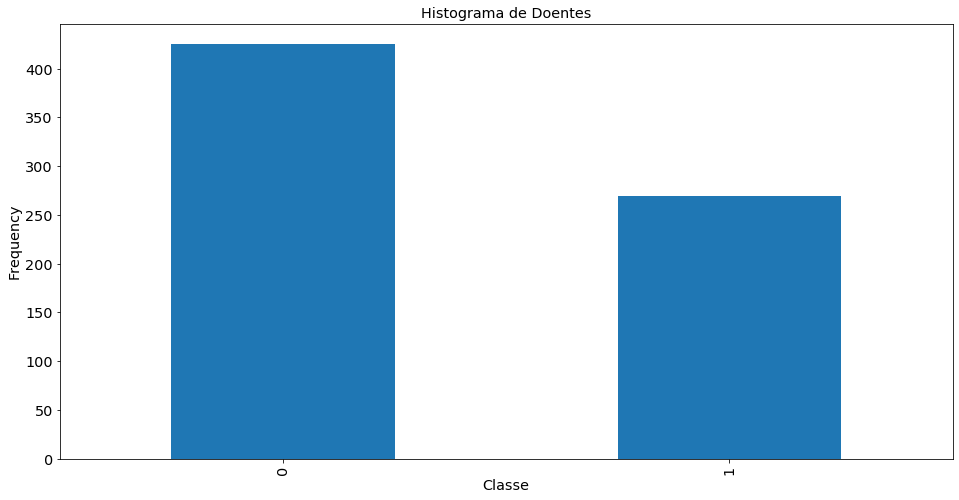

In [369]:
#Plotando valores
count_classes = pd.value_counts(y_train, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histograma de Doentes")
plt.xlabel("Classe")
plt.ylabel("Frequency")

In [0]:
#Balanceando
sm = SMOTE(random_state=1234)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

Text(0, 0.5, 'Frequency')

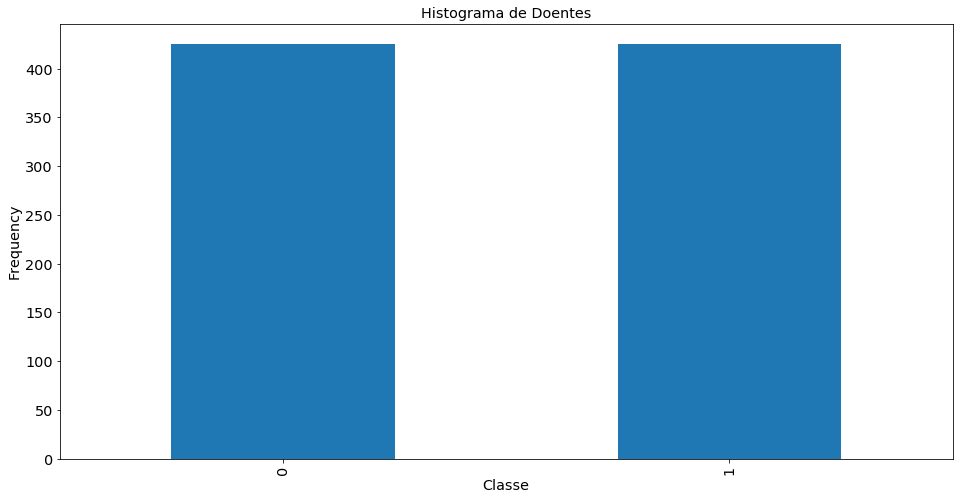

In [371]:
#Plotando valores dos sobreviventes
count_classes = pd.value_counts(y_train_res, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histograma de Doentes")
plt.xlabel("Classe")
plt.ylabel("Frequency")

In [0]:
def CMatrix(CM,labels =['Morreu','Viveu']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='Real'
    df.columns.name = 'Previsto'
    df.loc['Total']= df.sum()
    df['Total']= df.sum(axis=1)
    return df 

In [373]:
#Criando Matriz de Confusão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, precision_recall_curve

logistic_regression= LogisticRegression(solver = 'sag', max_iter = 10000)
log = logistic_regression.fit(X_train_res,y_train_res)

y_pred_test_log = logistic_regression.predict(X_test) 
acuracia_log = accuracy_score(y_pred=y_pred_test_log,y_true=y_test)
precisao_log = precision_score(y_pred=y_pred_test_log,y_true=y_test)
recall_log = recall_score(y_pred=y_pred_test_log,y_true=y_test)

CM= confusion_matrix(y_pred=y_pred_test_log,y_true=y_test)
CMatrix(CM)

Previsto,Morreu,Viveu,Total
Real,,,
Morreu,98,26,124
Viveu,11,62,73
Total,109,88,197


In [0]:
(98+62)/197

0.8121827411167513

In [376]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.68


In [0]:
#Preparando ids como PassengerId para a predição de sobreviventes 
ids = df_test['passengerid']
predictions = logreg.predict(test.drop('passengerid', axis=1))

#Convertendo e exportando o csv file com o nome submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [0]:
files.download('submission.csv')

FIM

In [379]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)
CM= confusion_matrix(y_pred=y_pred,y_true=y_test)
CMatrix(CM)

83.25


Previsto,Morreu,Viveu,Total
Real,,,
Morreu,109,15,124
Viveu,18,55,73
Total,127,70,197


In [380]:
(110+57)/197

0.8477157360406091

In [0]:
#set ids as PassengerId and predict survival 
ids = df_test['passengerid']
predictions = gbk.predict(test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission_gbk.csv', index=False)

In [0]:
files.download('submission_gbk.csv')